In [3]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [4]:
!python --version

Python 3.6.5 :: Anaconda, Inc.


In [5]:
pwd

'C:\\Users\\이동환\\Desktop'

In [6]:
# 네이버에서 검색어 입력받아 검색 한 후 블로그 메뉴를 선택하고
# 오른쪽에 있는 검색옵션 버튼을 눌러서
# 정렬 방식과 기간을 입력하기

#Step 0. 필요한 모듈과 라이브러리를 로딩하고 검색어를 입력 받습니다.
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm.notebook import tqdm

In [ ]:
query_txt = input('1.크롤링할 키워드는 무엇입니까?: ')
# query_txt2 = input('2.제외할 첫번째 키워드를 입력하세요: ')
# query_txt3 = input('3.제외할 두번째 키워드를 입력하세요: ')

start_date = input('4.조회를 시작할 날짜를 입력하세요(예:2017-01-01) :')
end_date = input('5.조회를 종료할 날짜를 입력하세요(예:2017-12-31): ')

In [2]:
query_txt="넷플릭스 드라마영화 추천"
start_date="20190801"
end_date="20190930"

In [7]:
#Step 1. 크롬 웹브라우저 실행
path = "chromedriver.exe"

driver = webdriver.Chrome(path)
# 사이트 주소는 네이버
driver.get('http://www.naver.com')
time.sleep(2)

#Step 2. 네이버 검색창에 "검색어" 검색
element = driver.find_element_by_id("query")
element.send_keys(query_txt)  # query_txt는 위에서 입력한 '이재용'
element.submit()

#Step 3. "블로그" 카테고리 선택
driver.find_element_by_link_text("블로그").click( )    # .click() 괄호 안을 눌러라는 뜻

#Step 4. 오른쪽의 검색 옵션 버튼 클릭
driver.find_element_by_id("_search_option_btn").click( )

#Step 5. 정렬 : "관련도순" 
# 개발자 도구에서 정렬 버튼의 id 가 보이지 않습니다.
# 이럴 경우 쉽게 사용할 수 있는 방법이 바로 xpath 를 이용하는 방법입니다.
# xpath는 개발자 도구에서 해당 메뉴 부분을 마우스 오른쪽 버튼을 누르고 
# copy -> copy xpath 를 선택하면 됩니다
# xpath 에 대한 자세한 내용은 이번 장의 뒷 부분을 참고하세요.

driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/a""").click( )  # 정렬 버튼의 xpath 클릭
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[1]/div/ul/li[1]/a""").click( ) # 관련도순 xpath



#Step 6. 날짜 입력
driver.find_element_by_xpath("""//*[@id="snb"]/div/ul/li[2]/a""").click()
time.sleep(2)

# 이 부분이 아주 중요합니다.
# 날짜 부분에 날짜를 입력할 때 입력 속도가 너무 빠를 경우 날짜가 입력이 되다가 
# 오타가 나오는 경우가 많습니다.
# 그래서 날짜를 입력할 때 for 반복문을 사용해서 1 글자씩 입력하도록 코딩했습니다.

# 시작 날짜 입력하기
s_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""")     
driver.find_element_by_xpath("""//*[@id="blog_input_period_begin"]""").click()
s_date.clear( )  # 날짜 입력 부분에 기존에 입력되어 있던 날짜를 제거합니다. 
time.sleep(1)
# 아래 코드가 날짜를 for 반복문으로 1 글자씩 입력하는 부분입니다.
for c in start_date:
    s_date.send_keys(c)
    time.sleep(0.1)
    
# 종료 날짜 입력하기
e_date = driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""")
driver.find_element_by_xpath("""//*[@id="blog_input_period_end"]""").click()
e_date.clear()
time.sleep(1)

for c in end_date:
    e_date.send_keys(c)
    time.sleep(0.1)
    
# Step7. 날짜 입력 "적용하기" 버튼을 클릭 합니다.  
driver.find_element_by_class_name("tx").click()
time.sleep(3)

# # Step 8. 상세 검색버튼을 클릭 후 제외할 단어들을 설정합니다.
# ele2 = driver.find_element_by_id("inpop3")
# ele2.send_keys(query_txt2)
# ele2.send_keys(',')
# ele2.send_keys(query_txt3)
# driver.find_element_by_css_selector(".btn_ft.ty_green._search").click( )


url_list = []
title_list = []

total_page = 5
for i in tqdm(range(0, total_page)):  # 페이지 번호
    i = i*10 + 1
    url = "https://search.naver.com/search.naver\
?date_from={0}&date_option=8&date_to={1}\
&dup_remove=1&nso=p%3Afrom{2}to{3}post_blogurl=\
&post_blogurl_without=&query={4}&sm=tab_pge&srchby=all&st=sim&where=post&start={5}".format(start_date,end_date,start_date,end_date,query_txt, i)
    driver.get(url)
    time.sleep(0.5)
    
    # URL 크롤링 시작
    titles = "a.sh_blog_title._sp_each_url._sp_each_title"
    article_raw = driver.find_elements_by_css_selector(titles)
#     article_raw

    # url 크롤링 시작    
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.get_attribute('title')   
        title_list.append(title)
    
        print(title)
    
print('url갯수: ', len(url_list))
print('url갯수: ', len(title_list))

df = pd.DataFrame({'url':url_list, 'title':title_list})

# 저장하기
df.to_excel("blog_url.xlsx")

[넷플릭스 추천] 넷플릭스 드라마, 애니, 영화 추천 영업하는 글
넷플릭스 추천 영화와 드라마
[영화/드라마 추천] 입문자도 볼 수 있는 넷플릭스 영화&드라마 추천
넷플릭스 추천 / 넷플릭스 드라마 추천 / 넷플릭스 영화 추천 / 추석연휴 몰아보기
[Netflix] 넷플릭스 추천 영화, 시트콤, 드라마 TOP 9 (미국,영국,중국) 스포X
넷플릭스 추천 영화, 드라마 <굿플레이스, 글리, 나의 마더, 러블리 스틸>
2019년08월 넷플릭스 영화랑 드라마 오늘은 뭘볼지 소개&추천
믿고 보는 넷플릭스 영화 & 드라마 추천 [신경대학교]
넷플릭스 드라마 추천 및 개인적인 평
넷플릭스 추천 드라마 이번에는 중드! 천성장가
일제강점기 시대를 배경으로 한 영화&드라마 추천(넷플릭스 기준)
킬링타임용 넷플릭스영화 추천
[넷플릭스 미드 추천] 최근 재미있게 본 미국 드라마 BEST 8
[넷플릭스] 미미일소흔경성 드라마 vs 영화
[재미] 넷플릭스 / NETFLIX / 넷플릭스영화추천 / 넷플릭스드라마추천 / 넷플릭스추천 / 넷플릭스미드추천 / 넷플릭스순위 / 기묘한이야기 / 3% / 셜록홈즈 / 블랙미러
넷플릭스 레즈커플(여성서사, 여성주연) 영화, 드라마 4편 추천 (통합자막 보는 방법)
[꿀잼보장] 뻔하지 않은 맹구리의 넷플릭스 영화 / 드라마 / 만화 / 다큐 추천 <3
넷플릭스 오리지널 컨텐츠 추천 (드라마)
넷플릭스 Netflix 추천 드라마 / 다큐멘터리
넷플릭스 드라마 추천
[넷플릭스] 넷플릭스 영화, 드라마 추천. 루시퍼, 악마는 프라다를 입는다, 본 투 비 블루
후회하지 않을 넷플릭스 드라마 추천 BEST 4
넷플릭스 그동안 봤던 드라마, 영화 모음 / 넷플릭스 추천 / 넷플릭스 간단 리뷰
볼만한 넷플릭스 영화&드라마 추천
넷플릭스 한국 드라마 추천 / 시그널 떳다 !
[넷플릭스 드라마 추천] 더소사이어티 THE SOCIETY
[후냐의추천특집] 가입했으면 봐야하는 넷플릭스 드라마 추천
2018년 개봉. 한국 드라마 영화 추천. 리틀 포레스트. 리뷰. 넷플릭스

# 글 크롤링하기

In [8]:
import sys
import os
import pandas as pd
import numpy as np

query_txt="넷플릭스 드라마영화 추천"
start_date="20190801"
end_date="20190930"

In [11]:
# "url_list.csv" 불러오기
url_load = pd.read_excel("blog_url.xlsx")        # 기본 모델

num_list = len(url_load)

print(num_list)
url_load

50


,url,title
0,https://blog.naver.com/jjs2865?Redirect=Log&lo...,"[넷플릭스 추천] 넷플릭스 드라마, 애니, 영화 추천 영업하는 글"
1,https://blog.naver.com/sally_w?Redirect=Log&lo...,넷플릭스 추천 영화와 드라마
2,https://daelimuc.blog.me/221612155889,[영화/드라마 추천] 입문자도 볼 수 있는 넷플릭스 영화&드라마 추천
3,https://blog.naver.com/rntrntrnt00?Redirect=Lo...,넷플릭스 추천 / 넷플릭스 드라마 추천 / 넷플릭스 영화 추천 / 추석연휴 몰아보기
4,https://skadbwjd9381.blog.me/221621897497,"[Netflix] 넷플릭스 추천 영화, 시트콤, 드라마 TOP 9 (미국,영국,중국..."
5,https://blog.naver.com/wmslzjwm?Redirect=Log&l...,"넷플릭스 추천 영화, 드라마 <굿플레이스, 글리, 나의 마더, 러블리 스틸>"
6,https://blog.naver.com/magiemark?Redirect=Log&...,2019년08월 넷플릭스 영화랑 드라마 오늘은 뭘볼지 소개&추천
7,https://blog.naver.com/shingyeong?Redirect=Log...,믿고 보는 넷플릭스 영화 & 드라마 추천 [신경대학교]
8,https://blog.naver.com/s0_ojin?Redirect=Log&lo...,넷플릭스 드라마 추천 및 개인적인 평
9,https://blog.naver.com/flyingchichi?Redirect=L...,넷플릭스 추천 드라마 이번에는 중드! 천성장가


In [13]:
dict = {}  # 전체 크롤링 데이터를 담을 그릇

# ★수집할 글 갯수
number = 3
for i in tqdm(range(0, number)): 
    # 글 띄우기
    url = url_load['url'][i]
    driver = webdriver.Chrome("chromedriver.exe")
    driver.get(url)   # 글 띄우기
    
    # 크롤링
    
    try : 
        # iframe 접근
        driver.switch_to_frame('mainFrame')

        target_info = {}

        # 제목 크롤링 시작
        overlays = ".se-fs-.se-ff-"                                 
        tit = driver.find_element_by_css_selector(overlays)         # title
        title = tit.text
        title

        # 글쓴이 크롤링 시작
        overlays = ".nick"                                 
        nick = driver.find_element_by_css_selector(overlays)         # nick
        nickname = nick.text

        # 날짜 크롤링
        overlays = ".se_publishDate.pcol2"                                 
        date = driver.find_element_by_css_selector(overlays)         # date
        datetime = date.text

        # 내용 크롤링
        overlays = ".se-component.se-text.se-l-default"                                 
        contents = driver.find_elements_by_css_selector(overlays)         # date

        content_list = []
        for content in contents:
            content_list.append(content.text)

        content_str = ' '.join(content_list)

        # 글 하나는 target_info라는 딕셔너리에 담기게 되고,
        target_info['title'] = title
        target_info['nickname'] = nickname
        target_info['datetime'] = datetime
        target_info['content'] = content_str

        # 각각의 글은 dict라는 딕셔너리에 담기게 됩니다.
        dict[i] = target_info
        time.sleep(1)
        
        print(i, title)

        # 글 하나 크롤링 후 크롬 창 닫기
        driver.close()       
    
    # 에러나면 다음 글(i+1)로 이동
    except:
        driver.close()
#         print("에러나는 글: " + i + ", " + title)
        continue

print('수집한 글 갯수: ', len(dict))
print(dict)    
    
# 판다스로 만들기
import pandas as pd
result_df = pd.DataFrame.from_dict(dict, 'index')

# 저장하기
result_df.to_excel("blog_content.xlsx")

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: use driver.switch_to.frame instead
  from ipykernel import kernelapp as app


0 [넷플릭스 추천] 넷플릭스 드라마, 애니, 영화 추천 영업하는 글 
1 넷플릭스 추천 영화와 드라마
2 안녕하세요!! 

수집한 글 갯수:  3
{0: {'title': '[넷플릭스 추천] 넷플릭스 드라마, 애니, 영화 추천 영업하는 글 ', 'nickname': '찌유', 'datetime': '2019. 8. 29. 9:40', 'content': '#넷플릭스드라마 #넷플릭스영화 #넷플릭스애니 #넷플릭스추천 #넷플릭스볼만한것 #넷플릭스 #넷플릭스추천글 찌유 취향 \n넷플릭스 추천\n[드라마] [애니] [영화]\n나눠서 정말 잼게 봤던거 위주로만 적었습니당. [ 드라마 ]\n[빨간머리앤] 진짜 정말 재미있게 봤던 빨간머리앤\n1-2화의 빨간머리앤의 말많은부분을 좀 견디면\n더더 재미있는 빨간머리앤 ㅠㅠ 2-3번 재탕해도\n하나도 안질리구 멋진 자연의모습과\n빨간머리앤 만화속에서 튀어나온거 같은 배우의\n멋진 연기력+명대사 들을 많이 들을 수 있습니다.\n앤의 따뜻한 마음과 앤을 돌봐주는 초록지붕가족의 훈훈한 모습,\n그리고 앤과 친구들의 우정! 너모 귀여움!!\n(다이애나..넘 착하고 예쁘고 그렇다)\n저절로 힐링이 되는 드라마..\ntmi 길버트 완전 잘생김..\n[굿걸스] 넷플릭스에서 가장 추천하는 드라마.\n진짜 한번보면 계속보게되구\n약간 막장스럽긴한데\n저는 완전 집중하면서 본... 정말 너무 너무 재미있구\n킬링타임용으로 딱 사회비판적인 내용도 나름 담겨있고\n사진속 세 주부가 동네마트를 털고나서 벌어지는 이야기고\n현재 시즌2까지 나와있는데, 매화마다 끝내는 타이밍이 진짜\n다음화를 보지않으면 안되겠고 ㅠㅠ\n끊어내는 타이밍이 스카이캐슬 수준\n진짜 존잼......!\n제 인생 드라마입니다.\n[오펀블랙] 대학시절 진짜 열심히 본 오펀블랙\n진짜 띵띵띵작!!!!\n주인공 배우분이 1인다역을하는데\n진짜 1화보고 너무 재미있어서 하루만에 시즌1다본거 같아요\n그런데 시즌2부터 약간 시들해져서..\n아무튼\n주인공이 지하철에서 자신과 똑같이 생긴

## 내용 텍스트 분석

In [1]:
# !pip install graphviz
# !pip install konlpy

import scipy as sp
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 워닝 없애주는 것
import warnings  
warnings.filterwarnings('ignore')

In [2]:
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

In [23]:
df_r = pd.read_excel("blog_content.xlsx")
df_r

,Unnamed: 0,title,nickname,datetime,content
0,5,"넷플릭스 추천 영화, 드라마 <굿플레이스, 글리, 나의 마더, 러블리 스틸>",ATDAWN\n(wmslzjwm),2019. 9. 2. 15:08,< 굿플레이스 > 내가 넷플릭스를 결제한 뒤 제일 처음으로 본 드라마. 나도 다른...
1,7,믿고 보는 넷플릭스 영화 & 드라마 추천 [신경대학교],신경대학교,2019. 8. 19. 15:27,안녕하세요 ! 개강이 얼마 남지 않았습니다 ㅠㅠ 이 시점에 더운 날씨 야외 활동에 ...
2,8,넷플릭스 드라마 추천 및 개인적인 평,cavtus,2019. 8. 7. 0:23,이 글 덕분에 작년 12월부터 넷플릭스를 보기 시작했다는 사실을 알았다. \nwow...
3,9,넷플릭스 추천 드라마 이번에는 중드! 천성장가,스텔라,2019. 9. 21. 21:20,안녕하세요 스텔라입니다.\n추석명절동안 며칠 놀고 그 뒤에 약간 의욕이 상실되어서 ...
4,10,일제강점기 시대를 배경으로 한 영화&드라마 추천(넷플릭스 기준),seunghye,2019. 8. 31. 23:23,우리나라 일제강점기 역사에 부담없이 다가가기 쉬운 컨텐츠인 영화와 드라마들을 추천해...
...,...,...,...,...,...
78,91,넷플릭스 영화추천[믿을 수 없는 이야기],nicemiki,2019. 9. 25. 11:30,"*믿을 수 없는 이야기, 믿기 싫은 이야기\n시리즈를 끝까지 보지 않고 감상을 쓰는..."
79,92,넷플릭스 영화추천 [여배우는 오늘도],nicemiki,2019. 9. 13. 11:30,*반갑다 문소리!\n적어도 내 또래라면 문소리에 대한 좋은 기억이 많을 것이다.\n...
80,94,넷플릭스 추천 - 종이의집 파트1 줄거리 결말 정주행!! 등장인물 및 관계도,Egg,2019. 8. 20. 0:23,넷플릭스는 오리지널 영화보다 드라마가 더 흥미롭고 재미가 있는 거 같아요. 정말 주...
81,95,추천 넷플릭스 오리지널 독일 드라마 ' 다크 ',라온이 아빠,2019. 8. 30. 18:39,안녕하세요! 새로운 주제로 찾아온 재미스냅 문교입니다.\n오늘 포스팅은 홍보글과 ...


In [24]:
df_r['title']

0      넷플릭스 추천 영화, 드라마 <굿플레이스, 글리, 나의 마더, 러블리 스틸>
1                  믿고 보는 넷플릭스 영화 & 드라마 추천 [신경대학교]
2                            넷플릭스 드라마 추천 및 개인적인 평
3                       넷플릭스 추천 드라마 이번에는 중드! 천성장가
4             일제강점기 시대를 배경으로 한 영화&드라마 추천(넷플릭스 기준)
                         ...                     
78                         넷플릭스 영화추천[믿을 수 없는 이야기]
79                           넷플릭스 영화추천 [여배우는 오늘도]
80    넷플릭스 추천 - 종이의집 파트1 줄거리 결말 정주행!! 등장인물 및 관계도 
81                    추천 넷플릭스 오리지널 독일 드라마 ' 다크 ' 
82                   넷플릭스 영화 추천, 숨어있는 명작 10편 소개해요
Name: title, Length: 83, dtype: object

In [25]:
content_list = df_r.content.values.tolist()

print(len(content_list))
content_list

83


["< 굿플레이스 >  내가 넷플릭스를 결제한 뒤 제일 처음으로 본 드라마. 나도 다른 사람한테 추천받아서 본 건데 그 자리에서 시즌 1기를 몽땅 다 봤다. 선과 악에 관련된 철학에 관심이 있다면 추천한다. 철학을 모르면 이해를 못하는 것도 아니기 때문에 가볍게 보기 좋은 드라마! 무엇보다 크리스틴 벨의 생활 연기가 진짜 최고였다. 이거 보면서 고등학교 떄 해운 윤리 수업이 생각나기도 했던.. \n 지금 시즌 3까지 나왔는데 9월 후반에 시즌 4가 나올 예정이라고 한다. 마지막 에피소드라고 하니까 얼른 얼른 챙겨봐야지 아니면 시즌 4 끝나고 몰아서 보는 것도 추천한다. 지루할 틈 없는 드라마! 내용도 무겁지 않아서 밥 먹을 때 틀어놓고 봐도 좋다. \n< 글리(Glee) > 뮤지컬을 좋아하거나 음악을 좋아한다면 당장 추천해주고 싶은 드라마. 뮤지컬 드라마라고 할 수 있는데 갑자기 다같이 노래를 부르기도 하고, 친구를 위해서 위로의 노래를 불러주기도 하고, 사랑하는 사람에게 사랑을 고백하거나 짝사랑의 마음을 노래로 표현하기도 한다. 한 화에 적어도 2개의 노래는 나오는 것 같은데 아주 옛날 곡을 부르는 경우도 많아서 가끔 명곡을 찾을 때도 있다.(개인적) \n등장인물이 굉장히 많은 편인데 한 명 한 명 놓치지 않고 서사를 주기 때문에 보는 재미가 가득한 드라마다. 또 흑인, 장애인, 동성애자에 대한 것도 다루고 있다는 점이 좋았다. 지루하려고 하면 노래가 나와서 금방 신나게 되는 glee! 시즌 6까지 나왔는데 하나도 빠짐 없이 재미있으니까 다 보길 추천한다.\n< 나의 마더(I am mother) > 넷플릭스에 들어가자마자 메인에 뜨길래 눌러서 바로 봤다. 솔직히 아무기대 없이 봤었는데 정말 너무 재미있어서 사람들한테 추천하고 다니는 작품. '마더'라고 불리는 로봇이 '딸'인 인간 여자를 사람이 만든 안전한 기지에서 키우고 있고, 그 곳에 다친 한 여자(힐러리 스왱크)가 들어오면서 내용이 전개된다.  키우다가  로봇이지만 양육자의 역할을 잘 해내는 모습에 놀랐

In [26]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [27]:
# 리스트 중 str 타입이 아닌 요소들이 존재함을 확인
for i in content_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [28]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 바꿔라!
for i in range(len(content_list)):
    if type(content_list[i]) != str:
        content_list[i] = str(content_list[i])

In [29]:
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [30]:
content_text

'< 굿플레이스 >  내가 넷플릭스를 결제한 뒤 제일 처음으로 본 드라마. 나도 다른 사람한테 추천받아서 본 건데 그 자리에서 시즌 1기를 몽땅 다 봤다. 선과 악에 관련된 철학에 관심이 있다면 추천한다. 철학을 모르면 이해를 못하는 것도 아니기 때문에 가볍게 보기 좋은 드라마! 무엇보다 크리스틴 벨의 생활 연기가 진짜 최고였다. 이거 보면서 고등학교 떄 해운 윤리 수업이 생각나기도 했던.. \n 지금 시즌 3까지 나왔는데 9월 후반에 시즌 4가 나올 예정이라고 한다. 마지막 에피소드라고 하니까 얼른 얼른 챙겨봐야지 아니면 시즌 4 끝나고 몰아서 보는 것도 추천한다. 지루할 틈 없는 드라마! 내용도 무겁지 않아서 밥 먹을 때 틀어놓고 봐도 좋다. \n< 글리(Glee) > 뮤지컬을 좋아하거나 음악을 좋아한다면 당장 추천해주고 싶은 드라마. 뮤지컬 드라마라고 할 수 있는데 갑자기 다같이 노래를 부르기도 하고, 친구를 위해서 위로의 노래를 불러주기도 하고, 사랑하는 사람에게 사랑을 고백하거나 짝사랑의 마음을 노래로 표현하기도 한다. 한 화에 적어도 2개의 노래는 나오는 것 같은데 아주 옛날 곡을 부르는 경우도 많아서 가끔 명곡을 찾을 때도 있다.(개인적) \n등장인물이 굉장히 많은 편인데 한 명 한 명 놓치지 않고 서사를 주기 때문에 보는 재미가 가득한 드라마다. 또 흑인, 장애인, 동성애자에 대한 것도 다루고 있다는 점이 좋았다. 지루하려고 하면 노래가 나와서 금방 신나게 되는 glee! 시즌 6까지 나왔는데 하나도 빠짐 없이 재미있으니까 다 보길 추천한다.\n< 나의 마더(I am mother) > 넷플릭스에 들어가자마자 메인에 뜨길래 눌러서 바로 봤다. 솔직히 아무기대 없이 봤었는데 정말 너무 재미있어서 사람들한테 추천하고 다니는 작품. \'마더\'라고 불리는 로봇이 \'딸\'인 인간 여자를 사람이 만든 안전한 기지에서 키우고 있고, 그 곳에 다친 한 여자(힐러리 스왱크)가 들어오면서 내용이 전개된다.  키우다가  로봇이지만 양육자의 역할을 잘 해내는 모습에

## 형태소분석을 마친 단어로 만든 token_ko

In [31]:
tokens_ko = t.morphs(content_text)
tokens_ko

['<',
 '굿',
 '플',
 '레이스',
 '>',
 '내',
 '가',
 '넷플릭스',
 '를',
 '결제',
 '한',
 '뒤',
 '제일',
 '처음',
 '으로',
 '본',
 '드라마',
 '.',
 '나도',
 '다른',
 '사람',
 '한테',
 '추천',
 '받아서',
 '본',
 '건데',
 '그',
 '자리',
 '에서',
 '시즌',
 '1',
 '기를',
 '몽땅',
 '다',
 '봤다',
 '.',
 '선',
 '과',
 '악',
 '에',
 '관련',
 '된',
 '철학',
 '에',
 '관심',
 '이',
 '있다면',
 '추천',
 '한다',
 '.',
 '철학',
 '을',
 '모르면',
 '이해',
 '를',
 '못',
 '하는',
 '것',
 '도',
 '아니기',
 '때문',
 '에',
 '가볍게',
 '보기',
 '좋은',
 '드라마',
 '!',
 '무엇',
 '보다',
 '크리스틴',
 '벨',
 '의',
 '생활',
 '연기',
 '가',
 '진짜',
 '최고',
 '였다',
 '.',
 '이',
 '거',
 '보면서',
 '고등학교',
 '떄',
 '해운',
 '윤리',
 '수업',
 '이',
 '생각나기도',
 '했던',
 '..',
 '지금',
 '시즌',
 '3',
 '까지',
 '나왔는데',
 '9월',
 '후반',
 '에',
 '시즌',
 '4',
 '가',
 '나올',
 '예정',
 '이라고',
 '한다',
 '.',
 '마지막',
 '에피소드',
 '라고',
 '하니까',
 '얼른',
 '얼른',
 '챙겨',
 '봐야지',
 '아니면',
 '시즌',
 '4',
 '끝나고',
 '몰아서',
 '보는',
 '것',
 '도',
 '추천',
 '한다',
 '.',
 '지루할',
 '틈',
 '없는',
 '드라마',
 '!',
 '내용',
 '도',
 '무겁지',
 '않아서',
 '밥',
 '먹을',
 '때',
 '틀어놓고',
 '봐도',
 '좋다',
 '.',
 '<',
 '글리',
 '(',
 'Glee

In [32]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

61701
10693


In [33]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('\n', 2634),
 ('.', 1882),
 ('이', 1537),
 ('을', 1089),
 ('의', 967),
 ('에', 879),
 (',', 832),
 ('가', 806),
 ('를', 792),
 ('들', 737),
 ('드라마', 706),
 ('는', 623),
 ('은', 493),
 ('도', 459),
 ('영화', 422),
 ('한', 364),
 ('으로', 354),
 ('것', 331),
 ('에서', 321),
 ('넷플릭스', 306),
 ('!', 293),
 ('추천', 292),
 ('시즌', 290),
 ('로', 287),
 ('적', 250),
 ('하는', 241),
 ('다', 231),
 ('그', 228),
 ('수', 226),
 ('(', 213),
 ('인', 207),
 ('과', 201),
 ('하고', 201),
 ('..', 193),
 ('와', 192),
 ('이야기', 184),
 ('사람', 183),
 (')', 180),
 ('?', 178),
 ('너무', 176),
 ('1', 162),
 ('나', 158),
 ("'", 157),
 ('까지', 154),
 ('...', 153),
 ('있는', 150),
 ('주인공', 149),
 ('저', 141),
 ('2', 137),
 ('만', 133),
 ('생각', 131),
 ('입니다', 129),
 ('할', 127),
 ('-', 123),
 ('정말', 122),
 ('더', 121),
 ('고', 115),
 ('3', 114),
 ('안', 106),
 ('내', 105),
 ('내용', 105),
 ('잘', 104),
 ('이다', 103),
 ('작품', 101),
 ('제', 99),
 ('많이', 99),
 ('때', 97),
 ('볼', 96),
 ('게', 96),
 ('중', 95),
 ('그리고', 93),
 (':', 92),
 ('요', 92),
 ('분', 90),
 ('하나', 88

In [34]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('드라마', 706),
 ('영화', 422),
 ('에서', 321),
 ('넷플릭스', 306),
 ('추천', 292),
 ('시즌', 290),
 ('적', 250),
 ('그', 228),
 ('인', 207),
 ('하고', 201),
 ('와', 192),
 ('이야기', 184),
 ('사람', 183),
 ('너무', 176),
 ('나', 158),
 ('까지', 154),
 ('주인공', 149),
 ('저', 141),
 ('만', 133),
 ('생각', 131),
 ('입니다', 129),
 ('정말', 122),
 ('더', 121),
 ('3', 114),
 ('안', 106),
 ('내', 105),
 ('내용', 105),
 ('이다', 103),
 ('작품', 101),
 ('많이', 99),
 ('볼', 96),
 ('그리고', 93),
 ('분', 90),
 ('된', 87),
 ('보고', 87),
 ('하게', 86),
 ('때문', 82),
 ('본', 81),
 ('진짜', 80),
 ('에게', 79),
 ('말', 79),
 ('하지만', 77),
 ('해', 77),
 ('같은', 75),
 ('한다', 74),
 ('합니다', 73),
 ('시작', 71),
 ('해서', 70),
 ('보다', 69),
 ('보는', 69)]

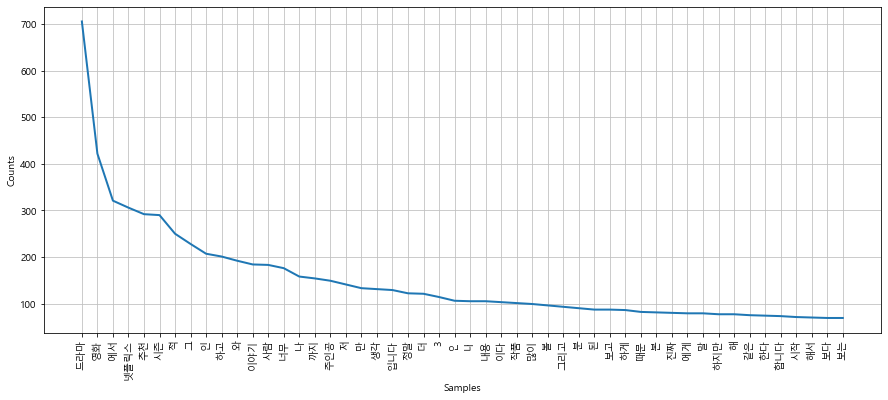

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [38]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [39]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('드라마', 706),
 ('영화', 422),
 ('에서', 321),
 ('넷플릭스', 306),
 ('추천', 292),
 ('시즌', 290),
 ('적', 250),
 ('그', 228),
 ('인', 207),
 ('하고', 201),
 ('와', 192),
 ('이야기', 184),
 ('사람', 183),
 ('너무', 176),
 ('나', 158),
 ('까지', 154),
 ('주인공', 149),
 ('저', 141),
 ('만', 133),
 ('생각', 131),
 ('입니다', 129),
 ('정말', 122),
 ('더', 121),
 ('3', 114),
 ('안', 106),
 ('내', 105),
 ('내용', 105),
 ('이다', 103),
 ('작품', 101),
 ('많이', 99),
 ('볼', 96),
 ('그리고', 93),
 ('분', 90),
 ('된', 87),
 ('보고', 87),
 ('하게', 86),
 ('때문', 82),
 ('본', 81),
 ('진짜', 80),
 ('에게', 79),
 ('말', 79),
 ('하지만', 77),
 ('해', 77),
 ('같은', 75),
 ('한다', 74),
 ('합니다', 73),
 ('시작', 71),
 ('해서', 70),
 ('보다', 69),
 ('보는', 69),
 ('친구', 69),
 ('부터', 69),
 ('같아요', 69),
 ('되는', 67),
 ('사실', 66),
 ('배우', 66),
 ('그런', 66),
 ('자신', 63),
 ('그냥', 63),
 ('없는', 62),
 ('사랑', 62),
 ('알', 62),
 ('화', 61),
 ('에는', 61),
 ('보면', 60),
 ('느낌', 59),
 ('걸', 59),
 ('개인', 58),
 ('또', 58),
 ('미드', 58),
 ('시간', 57),
 ('전', 57),
 ('스토리', 55),
 ('사건', 54),
 ('이런', 54),
 ('에요',

In [40]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

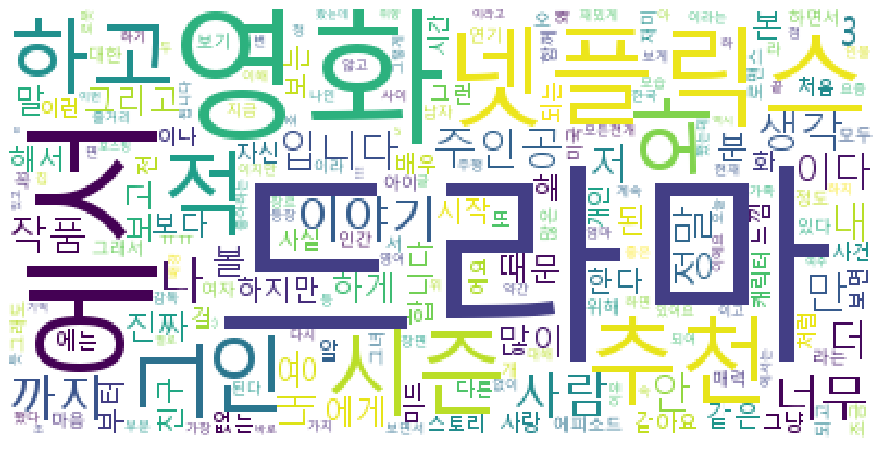

In [41]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()